## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
## Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style = "ticks")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn 
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [2]:
#reading the dataset
df = pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


#### Inference:
- we can observe that there is no missing values.

### 1. Make a list of categorical and numerical columns in the data.

In [4]:
cat = []
num = []

for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
    else:
        num.append(i)
print("Categorical columns are: ", cat)
print("Numerical columns are: ",num)

Categorical columns are:  ['sex', 'smoker', 'day', 'time']
Numerical columns are:  ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [5]:
## getting the mean of 'total_bill' for each 'day'
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [6]:
## getting average of tips given by every gender by calculating mean
df.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

#### Inference:
- Males are more generous in giving tips.

### 4. According to the data, were there more customers for dinner or lunch?

In [7]:
df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

#### Inference:
- According to the data, there were more customers for Dinner.

### 5. Based on the statistical summary, comment on the variable 'tip'

In [8]:
## for getting the summary of the column 'tip' we are using describe()
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

#### Inference:
- There are 244 float type entries for the column 'tip' in the dataset, that means all the groups are giving the tip.
- Mean is 2.99 that means Average tip amount is around 3 dollars.
- The minimum tip amount given is 1 and maximum tip amount given is 10.
- As the maximum tip amount is significantly higher than average, so there could be some possibility of outliers.

### 6. Find the busiest day in terms of the orders?

In [9]:
## first we are calculating the total of 'size' for each day (orders per day)
## then idxmax() is giving us maximum among the orders.
df.groupby('day')['size'].sum().idxmax()

'Sat'

#### Inference:
- So, the Busiest day in terms of the order is Saturday.

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [10]:
## calculating the skew value of the column 'total_bill'
df['total_bill'].skew()

1.1332130376158205

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

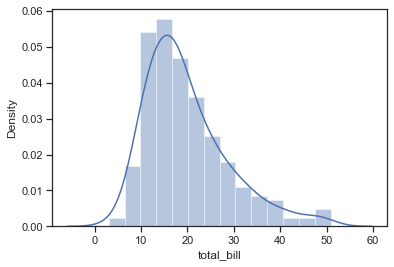

In [11]:
sns.distplot(df['total_bill'])

#### Inference:
- The skew value of the column 'total_bill' is 1.133 that is greater than 1. 
  So it is positively skewed.
- And by abserving the plot, it is clear that 'total_bill' is positively skewed.

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [12]:
## correlation between 'tip' and 'total_bill'
df[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

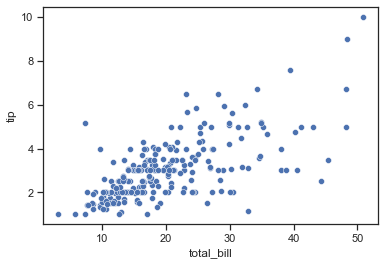

In [13]:
sns.scatterplot(x='total_bill',y='tip',data=df)

#### findings:
- there is a positive correlation between the 'total_bill' amount paid by the customer and the 'tip' amount. 
- As the 'total_bill' increases, the 'tip' amount also increases, so 'tip' is directly proportional to 'total_bill'.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

<AxesSubplot:ylabel='sex'>

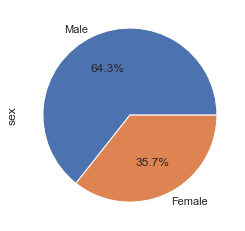

In [14]:
df['sex'].value_counts(normalize=True).plot(kind = 'pie', autopct = '%1.1f%%')

# 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [15]:
## calculating gender-wise count based on smoking habits
pd.crosstab(df['sex'], df['smoker'])

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


<AxesSubplot:xlabel='sex'>

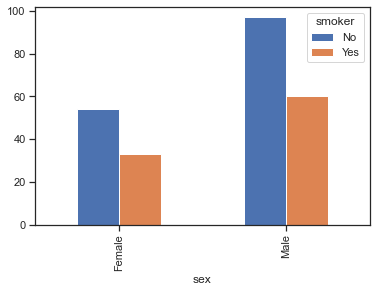

In [16]:
pd.crosstab(df['sex'], df['smoker']).plot(kind='bar')

### 11. Compute the average tip amount given for different days and display it in the plot.

In [17]:
## computing average of tip amount for each day
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

<AxesSubplot:xlabel='day', ylabel='tip'>

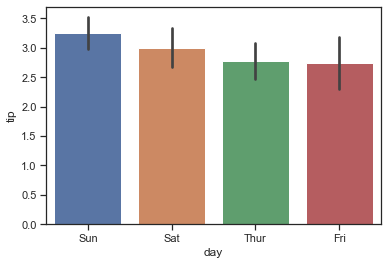

In [18]:
## plotting the average of tip amount for each day with bar-plot
sns.barplot(x='day', y='tip', data=df)

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [19]:
## calculating average bill amount as per the size of customer group
df.groupby('size')['total_bill'].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

<AxesSubplot:xlabel='size'>

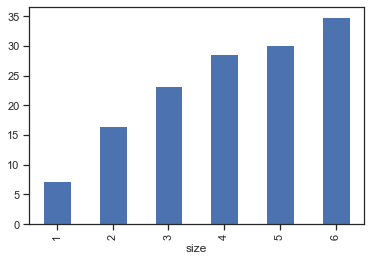

In [20]:
## visualizing the relationship using bar plot
df.groupby('size')['total_bill'].mean().plot(kind='bar')

#### Inference:
- It appears that there is a linear relationship between the size of the customer group and the 'total_bill' amount paid.
- When the customer group size is larger, the 'total_bill' amount tends to be higher.
- As the size of the group increases, the 'total_bill' amount increases proportionally.
- This suggests that there is a dependency between the size of the customer group and the 'total_bill' amount, and this dependency follows a linear pattern.

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

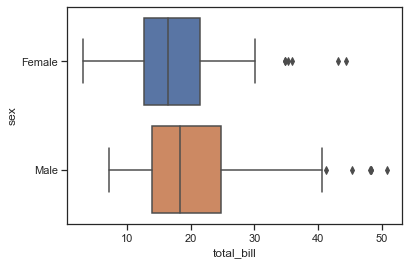

In [21]:
sns.boxplot(x = 'total_bill', y = 'sex', data = df, orient='h')
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [22]:
## As we only need Saturday/Sunday so filtering dataset
arr = ['Sat', 'Sun']
filter_df = df.loc[df['day'].isin(arr)]

## max of bill amount from filtered dataset
filter_df.groupby(['day','time'])['total_bill'].max() 

day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64

#### Note:
- On Saturday and Sunday, people chose to have dinner hence max amount displayed only for Dinner and none for the Lunch.

### 15. Compute the percentage of missing values in the dataset.

In [23]:
## computing the percentage of missing values
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

#### Inference
- there is no missing values

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [24]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [25]:
len(df[df.duplicated()])

1

In [26]:
## dataset before dropping duplicates
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [27]:
## dropping duplicates
df1 = df.drop_duplicates()

In [28]:
## dataset after dropping duplicates
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Inference:
- Within the dataset, there was one instance of a duplicate record. 
- Originally, the dataset contained 244 records. After removing the duplicate record, the dataset now consists of 243 unique records.
- Therefore, it can be concluded that the duplicate record has been successfully identified and removed from the dataset, resulting in a total reduction of one record.

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

<AxesSubplot:xlabel='total_bill'>

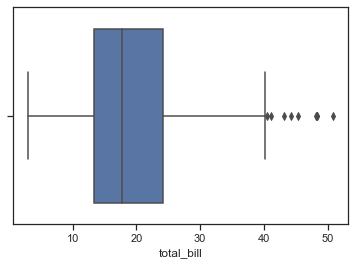

In [29]:
## plotting the box-plot of total-bill (with outliers)
sns.boxplot(df['total_bill'])

In [30]:
## treating the outliers using log transformation
df['total_bill_trans'] = np.log(df['total_bill'])

<AxesSubplot:xlabel='total_bill_trans'>

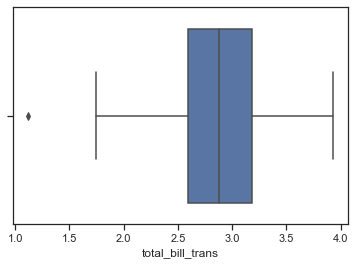

In [31]:
## boxplot after log transformation
sns.boxplot(df['total_bill_trans'])

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

<AxesSubplot:xlabel='tip'>

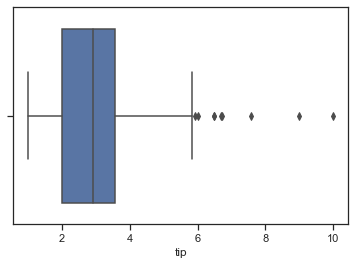

In [33]:
## Checking the outliers with the box-plot for the column 'tip' 
sns.boxplot(df['tip'])

In [34]:
## IQR treatment for outliers:

Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1

lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)

df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)]

<AxesSubplot:xlabel='tip'>

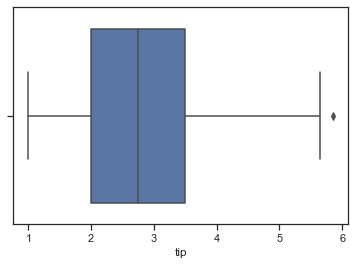

In [35]:
## plotting boxplot on the IQR treated dataset
sns.boxplot(df_out['tip'])

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [36]:
## encoding categorical columns in the dataset (with first-column type removed) and printing 5 random samples
df = pd.get_dummies(df, drop_first = True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
227,20.45,3.0,4,3.017983,1,0,1,0,0,0
212,48.33,9.0,4,3.878052,1,0,1,0,0,0
230,24.01,2.0,4,3.178470,1,1,1,0,0,0
13,18.43,3.0,4,2.913980,1,0,0,1,0,0
118,12.43,1.8,2,2.520113,0,0,0,0,1,1


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [37]:
## Checking the range of the column 'total_bill'
df['total_bill'].max() - df['total_bill'].min() 

47.74

In [38]:
## initializing MinMaxScaler
mm = MinMaxScaler()

In [39]:
## Normalizing the values of the total_bill, so that the range will be 1.
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']]) 

In [40]:
## Checking the range after normalization
df['total_bill_mm'].max() - df['total_bill_mm'].min() 

0.9999999999999999

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [41]:
## Loading the dataset
tips_df = pd.read_csv('tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
## i) Encoding categorical variables
tips_df = pd.get_dummies(tips_df, drop_first = True)
tips_df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


In [43]:
## ii) Storing the target column (i.e.tip) in y variable and the rest of the columns in the X variable.
X = tips_df.drop('tip', axis = 1)
y = tips_df['tip']

In [44]:
X.head()

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,2,0,0,0,1,0,0
1,10.34,3,1,0,0,1,0,0
2,21.01,3,1,0,0,1,0,0
3,23.68,2,1,0,0,1,0,0
4,24.59,4,0,0,0,1,0,0


In [45]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [46]:
#spliting the dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(170, 8) (74, 8)
(170,) (74,)


In [47]:
##Scaling the data using MinMaxScaler
mm = MinMaxScaler()

X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mm.fit_transform(X_test.iloc[:,:2])

In [48]:
X_train.iloc[:,:2].sample(5)

,total_bill,size
18,0.236958,0.4
93,0.221112,0.2
148,0.061677,0.2
220,0.119698,0.2
154,0.305217,0.6


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [49]:
## Fitting Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
## computing predictions on the test data
pred = lr.predict(X_test)

In [51]:
## Computing r2_score and printing
print('R square value', r2_score(y_test, pred))

R square value 0.49396071682818576


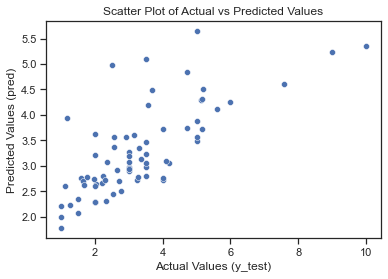

In [52]:
## plotting a scatter plot to view the distribution between test-data and predictions
sns.scatterplot(x=y_test, y=pred)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (pred)')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

### Happy Learning:)